## Добавление библиотек по auto ml

In [118]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM Zulu11.2+3 (build 11.0.1+13-LTS, mixed mode)
  Starting server from C:\Users\yaroslav\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\yaroslav\AppData\Local\Temp\tmpf8d_exs6
  JVM stdout: C:\Users\yaroslav\AppData\Local\Temp\tmpf8d_exs6\h2o_yaroslav_started_from_python.out
  JVM stderr: C:\Users\yaroslav\AppData\Local\Temp\tmpf8d_exs6\h2o_yaroslav_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,Asia/Yekaterinburg
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.1.1
H2O cluster version age:,18 days
H2O cluster name:,H2O_from_python_yaroslav_glel88
H2O cluster total nodes:,1
H2O cluster free memory:,1.896 Gb
H2O cluster total cores:,0
H2O cluster allowed cores:,0
H2O cluster status:,"accepting new members, healthy"


# Открытие таблиц

In [2]:
import pandas as pd
import numpy as np


subs_csi = pd.read_csv('subs_csi_train.csv', sep=';', decimal = '.', engine = 'python')
sk_id_train = pd.read_csv('SK_ID_train.csv')

In [3]:
#import date_converter as conv

#converted_date = conv.string_to_datetime('Jun 1 2005  1:33PM', '%b %d %Y %I:%M%p')

In [4]:
subs_features = pd.read_csv('./subs_features_train.csv', sep=';', decimal = ',', parse_dates = ['SNAP_DATE'])
#subs_features = pd.read_csv('./subs_features_train.csv', sep=';', decimal = ',')

In [5]:
subs_features.head()

,SNAP_DATE,COM_CAT#1,SK_ID,COM_CAT#2,COM_CAT#3,BASE_TYPE,ACT,ARPU_GROUP,COM_CAT#7,COM_CAT#8,...,COM_CAT#25,COM_CAT#26,COM_CAT#27,COM_CAT#28,COM_CAT#29,COM_CAT#30,COM_CAT#31,COM_CAT#32,COM_CAT#33,COM_CAT#34
0,2001-01-08,4,3339,80,5,2,1,12.0,1,1489.0,...,1,1,0.031696,0.076724,0.040279,0.0133,0.083382,0.027579,0.103896,2.0
1,2001-01-08,4,238,75,5,2,1,7.0,1,945.0,...,1,1,0.015893,0.012981,0.000000,0.0000,0.048930,0.027579,0.103896,3.0
2,2001-01-08,4,4669,43,5,2,1,3.0,3,1033.0,...,1,1,0.000415,0.000000,0.000000,0.0000,0.009397,0.027579,0.103896,3.0
3,2001-01-08,4,2555,54,5,2,1,12.0,1,512.0,...,1,1,0.046510,0.039486,0.000829,0.0000,0.196676,0.027579,0.103896,1.0
4,2001-01-08,4,2291,38,5,2,1,7.0,1,1268.0,...,1,1,0.005393,0.007385,0.003884,0.0000,0.047297,0.027579,0.103896,6.0


In [6]:
#Выделяем месяца
subs_features["SNAP_DATE"] = subs_features["SNAP_DATE"].dt.day.astype(int)

In [7]:
subs_features.head()

,SNAP_DATE,COM_CAT#1,SK_ID,COM_CAT#2,COM_CAT#3,BASE_TYPE,ACT,ARPU_GROUP,COM_CAT#7,COM_CAT#8,...,COM_CAT#25,COM_CAT#26,COM_CAT#27,COM_CAT#28,COM_CAT#29,COM_CAT#30,COM_CAT#31,COM_CAT#32,COM_CAT#33,COM_CAT#34
0,8,4,3339,80,5,2,1,12.0,1,1489.0,...,1,1,0.031696,0.076724,0.040279,0.0133,0.083382,0.027579,0.103896,2.0
1,8,4,238,75,5,2,1,7.0,1,945.0,...,1,1,0.015893,0.012981,0.000000,0.0000,0.048930,0.027579,0.103896,3.0
2,8,4,4669,43,5,2,1,3.0,3,1033.0,...,1,1,0.000415,0.000000,0.000000,0.0000,0.009397,0.027579,0.103896,3.0
3,8,4,2555,54,5,2,1,12.0,1,512.0,...,1,1,0.046510,0.039486,0.000829,0.0000,0.196676,0.027579,0.103896,1.0
4,8,4,2291,38,5,2,1,7.0,1,1268.0,...,1,1,0.005393,0.007385,0.003884,0.0000,0.047297,0.027579,0.103896,6.0


In [8]:
subs_features.shape

(47411, 36)

## Соединение таблиц subs_features и subs_csi

In [9]:
subs_csi_features_2 = subs_csi.merge(subs_features,  left_on='SK_ID', right_on='SK_ID', how='outer')

In [10]:
subs_csi_features_2.head()

,SK_ID,CSI,CONTACT_DATE,SNAP_DATE,COM_CAT#1,COM_CAT#2,COM_CAT#3,BASE_TYPE,ACT,ARPU_GROUP,...,COM_CAT#25,COM_CAT#26,COM_CAT#27,COM_CAT#28,COM_CAT#29,COM_CAT#30,COM_CAT#31,COM_CAT#32,COM_CAT#33,COM_CAT#34
0,2,0,4.05,3,7,77,10,1,1,10.0,...,1,1,0.002070,0.007335,0.000050,0.002785,0.029765,0.027579,0.103896,NaN
1,2,0,4.05,2,7,77,9,1,1,10.0,...,1,1,0.003913,0.001590,0.000018,0.001954,0.054871,0.027579,0.103896,NaN
2,2,0,4.05,5,7,77,12,1,1,9.0,...,1,1,0.001801,0.008317,0.000081,0.002441,0.018126,0.027579,0.103896,9.0
3,2,0,4.05,1,7,77,17,1,1,6.0,...,1,0,0.001798,0.002048,0.000033,0.002331,0.022108,0.027579,0.103896,NaN
4,2,0,4.05,4,7,77,11,1,1,8.0,...,1,1,0.006520,0.001408,0.000010,0.001709,0.022772,0.027579,0.103896,9.0


## Замена пропусков

In [11]:
# Лучше убирать, пропусков не так много

subs_csi_features_2 = subs_csi_features_2.dropna(axis=0, subset=['ARPU_GROUP','COM_CAT#8', 'DEVICE_TYPE_ID','INTERNET_TYPE_ID', 'COM_CAT#34'])

In [12]:
subs_csi_features_2.shape

(45709, 38)

In [13]:
subs_csi_features_2.head()

,SK_ID,CSI,CONTACT_DATE,SNAP_DATE,COM_CAT#1,COM_CAT#2,COM_CAT#3,BASE_TYPE,ACT,ARPU_GROUP,...,COM_CAT#25,COM_CAT#26,COM_CAT#27,COM_CAT#28,COM_CAT#29,COM_CAT#30,COM_CAT#31,COM_CAT#32,COM_CAT#33,COM_CAT#34
2,2,0,4.05,5,7,77,12,1,1,9.0,...,1,1,0.001801,0.008317,0.000081,0.002441,0.018126,0.027579,0.103896,9.0
4,2,0,4.05,4,7,77,11,1,1,8.0,...,1,1,0.006520,0.001408,0.000010,0.001709,0.022772,0.027579,0.103896,9.0
5,3,0,21.05,1,4,51,12,1,1,7.0,...,1,1,0.002012,0.000989,0.000636,0.000000,0.001456,0.027579,0.103896,9.0
6,3,0,21.05,12,4,51,11,1,1,8.0,...,1,1,0.020497,0.034779,0.000861,0.000000,0.026669,0.027579,0.103896,9.0
9,3,0,21.05,2,4,51,13,1,1,5.0,...,1,1,0.001383,0.005999,0.000969,0.000000,0.003919,0.027579,0.103896,9.0


## Определение категориальных и количественных признаков

## Определение значимых признаков в датасете

## Группировка subs_csi_features

In [14]:
#Нет смысла добавлять в группировку что-то еще, так как текущая связка из двух полей покрывает все остальные
subs_csi_features_group = subs_csi_features_2.groupby(['SK_ID','SNAP_DATE']).mean()


In [15]:
subs_csi_features_group.shape

(45709, 35)

In [138]:
subs_csi_features_group.head()

CSI  CONTACT_DATE  COM_CAT#1  COM_CAT#2  COM_CAT#3  \
SK_ID SNAP_DATE                                                       
2     4            0          4.05          7         77         11   
      5            0          4.05          7         77         12   
3     1            0         21.05          4         51         12   
      2            0         21.05          4         51         13   
      3            0         21.05          4         51         14   

                 BASE_TYPE  ACT  ARPU_GROUP  COM_CAT#7  COM_CAT#8     ...      \
SK_ID SNAP_DATE                                                       ...       
2     4                  1    1         8.0          2     1318.0     ...       
      5                  1    1         9.0          2     1318.0     ...       
3     1                  1    1         7.0          2      742.0     ...       
      2                  1    1         5.0          2      742.0     ...       
      3                  2    1        12.0          2      742.0     ...       

                 COM_CAT#25  COM_CAT#26  COM_CAT#27  COM_CAT#28  COM_CAT#29  \
SK_ID SNAP_DATE                                                               
2     4                   1           1    0.006520    0.001408    0.000010   
      5                   1           1    0.001801    0.008317    0.000081   
3     1                   1           1    0.002012    0.000989    0.000636   
      2                   1           1    0.001383    0.005999    0.000969   
      3                   1           1    0.001214    0.006095    0.001501   

                 COM_CAT#30  COM_CAT#31  COM_CAT#32  COM_CAT#33  COM_CAT#34  
SK_ID SNAP_DATE                                                              
2     4            0.001709    0.022772    0.027579    0.103896         9.0  
      5            0.002441    0.018126    0.027579    0.103896         9.0  
3     1            0.000000    0.001456    0.027579    0.103896         9.0  
      2            0.000000    0.003919    0.027579    0.103896         9.0  
      3            0.000000    0.002942    0.027579    0.103896         9.0  

[5 rows x 35 columns]

## Открытие третьей таблицы, определение динамики активности абонентов

In [17]:
subs_bs_consumption = pd.read_csv('./subs_bs_consumption_train.csv', sep=';', decimal = ',', parse_dates = ['MON'])

In [18]:
subs_bs_consumption.head()

,SK_ID,CELL_LAC_ID,MON,SUM_MINUTES,SUM_DATA_MB,SUM_DATA_MIN
0,1827,240277,01.03,0.000000,0.000002,0.000234
1,1827,355195,01.03,0.000072,0.000000,0.000000
2,1827,238554,01.04,0.000000,0.000019,0.000326
3,1827,350978,01.04,0.016576,0.002260,0.004329
4,1827,315010,01.04,0.012755,0.001186,0.002491


### Динамика активности абонента

In [19]:
consumption_train = subs_bs_consumption[['SK_ID','MON', 'SUM_MINUTES', 'SUM_DATA_MB', 'SUM_DATA_MIN']]
consumption_sum_mon = consumption_train.groupby(['SK_ID']).mean()  #среднее значение по месяцам
consumption_mon = consumption_train[['SK_ID','MON']]  #выбираем только месяца
consumption_mean_mon = consumption_mon.groupby(['SK_ID']).max() #Узнаем максимальный месяц у каждого абонента

In [20]:
#Делаем группировку, чтобы вычислить активность абонентов в последний для них месяц (в истории)
consumption_group = consumption_mean_mon.merge(consumption_sum_mon, left_on='SK_ID', right_on='SK_ID', how='inner')

In [21]:
#Получили среднее значения последнего месяца для абонента в ячейке последнего месяца для него
consumption_group.head()

,MON,SUM_MINUTES,SUM_DATA_MB,SUM_DATA_MIN
SK_ID,,,,
2,01.05,0.000554,0.000047,0.004205
3,01.05,0.004911,0.000398,0.060658
4,01.05,0.005607,0.000000,0.000000
5,01.05,0.000842,0.000871,0.004767
6,01.05,0.001875,0.000000,0.000000


In [22]:
subs_bs_consumption_group = consumption_train.groupby(['SK_ID']).sum() #Делаем суумирование трафика абонентов в месяце 05
consumption_2 = consumption_train.groupby(['SK_ID','MON']).sum() # Делаем суммирование просто по месяцам
consumption_trend = consumption_group.merge(consumption_2, left_on=['SK_ID','MON'], right_on=['SK_ID','MON'], how='inner') 
#соединяем таблице inner join, чтобы вычислять динамику
consumption_trend['SUM_MINUTES_x'] = consumption_trend['SUM_MINUTES_x'] - consumption_trend['SUM_MINUTES_y'] 
consumption_trend['SUM_DATA_MB_x'] = consumption_trend['SUM_DATA_MB_x'] - consumption_trend['SUM_DATA_MB_y'] 
consumption_trend['SUM_DATA_MIN_x'] = consumption_trend['SUM_DATA_MIN_x'] - consumption_trend['SUM_DATA_MIN_y'] 

consumption_trend = consumption_trend.drop(('SUM_MINUTES_y'), axis=1) 
consumption_trend = consumption_trend.drop(('SUM_DATA_MB_y'), axis=1) 
consumption_trend = consumption_trend.drop(('SUM_DATA_MIN_y'), axis=1) 

In [23]:
consumption_trend.head()

,MON,SUM_MINUTES_x,SUM_DATA_MB_x,SUM_DATA_MIN_x
SK_ID,,,,
2,01.05,-0.036174,-0.004328,-0.379529
3,01.05,-0.057364,-0.000938,-0.289759
4,01.05,-0.105326,0.000000,0.000000
5,01.05,-0.130796,-0.079279,-0.739966
6,01.05,-0.026522,0.000000,0.000000


## Соединение 3 таблиц, группировка по SK_ID

In [24]:
subs_csi_features_con = subs_csi_features_group.merge(consumption_trend, left_on='SK_ID', right_on='SK_ID', how='inner')

In [25]:
subs_csi_features_con.head()

,CSI,CONTACT_DATE,COM_CAT#1,COM_CAT#2,COM_CAT#3,BASE_TYPE,ACT,ARPU_GROUP,COM_CAT#7,COM_CAT#8,...,COM_CAT#29,COM_CAT#30,COM_CAT#31,COM_CAT#32,COM_CAT#33,COM_CAT#34,MON,SUM_MINUTES_x,SUM_DATA_MB_x,SUM_DATA_MIN_x
SK_ID,,,,,,,,,,,,,,,,,,,,,
2,0,4.05,7,77,11,1,1,8.0,2,1318.0,...,0.000010,0.001709,0.022772,0.027579,0.103896,9.0,01.05,-0.036174,-0.004328,-0.379529
2,0,4.05,7,77,12,1,1,9.0,2,1318.0,...,0.000081,0.002441,0.018126,0.027579,0.103896,9.0,01.05,-0.036174,-0.004328,-0.379529
3,0,21.05,4,51,12,1,1,7.0,2,742.0,...,0.000636,0.000000,0.001456,0.027579,0.103896,9.0,01.05,-0.057364,-0.000938,-0.289759
3,0,21.05,4,51,13,1,1,5.0,2,742.0,...,0.000969,0.000000,0.003919,0.027579,0.103896,9.0,01.05,-0.057364,-0.000938,-0.289759
3,0,21.05,4,51,14,2,1,12.0,2,742.0,...,0.001501,0.000000,0.002942,0.027579,0.103896,9.0,01.05,-0.057364,-0.000938,-0.289759


In [26]:
subs_csi_features_con.shape

(45627, 39)

In [27]:
train = subs_csi_features_con.groupby(['SK_ID']).mean()

In [28]:
train.head()

,CSI,CONTACT_DATE,COM_CAT#1,COM_CAT#2,COM_CAT#3,BASE_TYPE,ACT,ARPU_GROUP,COM_CAT#7,COM_CAT#8,...,COM_CAT#28,COM_CAT#29,COM_CAT#30,COM_CAT#31,COM_CAT#32,COM_CAT#33,COM_CAT#34,SUM_MINUTES_x,SUM_DATA_MB_x,SUM_DATA_MIN_x
SK_ID,,,,,,,,,,,,,,,,,,,,,
2,0.0,4.05,7.0,77.0,11.500000,1.0,1.0,8.500000,2.000000,1318.000000,...,0.004862,0.000046,0.002075,0.020449,0.027579,0.103896,9.0,-0.036174,-0.004328,-0.379529
3,0.0,21.05,4.0,51.0,13.500000,1.5,1.0,9.000000,2.000000,756.166667,...,0.019320,0.001018,0.000104,0.014257,0.027579,0.103896,9.0,-0.057364,-0.000938,-0.289759
4,0.0,27.05,8.0,12.0,3.833333,2.0,1.0,6.166667,2.916667,1102.333333,...,0.003972,0.000000,0.000000,0.039371,0.027579,0.103896,3.0,-0.105326,0.000000,0.000000
5,0.0,8.05,3.0,79.0,2.000000,2.0,1.0,8.833333,1.000000,110.000000,...,0.002000,0.071332,0.001833,0.051395,0.027579,0.103896,2.0,-0.130796,-0.079279,-0.739966
6,1.0,6.05,5.0,48.0,5.000000,2.0,1.0,2.166667,4.000000,937.000000,...,0.000103,0.000000,0.000000,0.012235,0.027579,0.103900,3.0,-0.026522,0.000000,0.000000


In [29]:
train.shape

(4048, 38)

In [30]:
train.columns

Index(['CSI', 'CONTACT_DATE', 'COM_CAT#1', 'COM_CAT#2', 'COM_CAT#3',
       'BASE_TYPE', 'ACT', 'ARPU_GROUP', 'COM_CAT#7', 'COM_CAT#8',
       'DEVICE_TYPE_ID', 'INTERNET_TYPE_ID', 'REVENUE', 'ITC', 'VAS',
       'RENT_CHANNEL', 'ROAM', 'COST', 'COM_CAT#17', 'COM_CAT#18',
       'COM_CAT#19', 'COM_CAT#20', 'COM_CAT#21', 'COM_CAT#22', 'COM_CAT#23',
       'COM_CAT#25', 'COM_CAT#26', 'COM_CAT#27', 'COM_CAT#28', 'COM_CAT#29',
       'COM_CAT#30', 'COM_CAT#31', 'COM_CAT#32', 'COM_CAT#33', 'COM_CAT#34',
       'SUM_MINUTES_x', 'SUM_DATA_MB_x', 'SUM_DATA_MIN_x'],
      dtype='object')

## Деление на X и Y

In [106]:
X = train.drop(('CSI'), axis=1)  # Выбрасываем столбец 'class'.  
X = X.drop(('COM_CAT#19'), axis=1)
X = X.drop(('COM_CAT#25'), axis=1)
y = train['CSI']
feature_names = X.columns
print(feature_names)

Index(['CONTACT_DATE', 'COM_CAT#1', 'COM_CAT#2', 'COM_CAT#3', 'BASE_TYPE',
       'ACT', 'ARPU_GROUP', 'COM_CAT#7', 'COM_CAT#8', 'DEVICE_TYPE_ID',
       'INTERNET_TYPE_ID', 'REVENUE', 'ITC', 'VAS', 'RENT_CHANNEL', 'ROAM',
       'COST', 'COM_CAT#17', 'COM_CAT#18', 'COM_CAT#20', 'COM_CAT#21',
       'COM_CAT#22', 'COM_CAT#23', 'COM_CAT#26', 'COM_CAT#27', 'COM_CAT#28',
       'COM_CAT#29', 'COM_CAT#30', 'COM_CAT#31', 'COM_CAT#32', 'COM_CAT#33',
       'COM_CAT#34', 'SUM_MINUTES_x', 'SUM_DATA_MB_x', 'SUM_DATA_MIN_x'],
      dtype='object')


In [107]:
X.shape

(4048, 35)

In [108]:
X.head()

,CONTACT_DATE,COM_CAT#1,COM_CAT#2,COM_CAT#3,BASE_TYPE,ACT,ARPU_GROUP,COM_CAT#7,COM_CAT#8,DEVICE_TYPE_ID,...,COM_CAT#28,COM_CAT#29,COM_CAT#30,COM_CAT#31,COM_CAT#32,COM_CAT#33,COM_CAT#34,SUM_MINUTES_x,SUM_DATA_MB_x,SUM_DATA_MIN_x
SK_ID,,,,,,,,,,,,,,,,,,,,,
2,4.05,7.0,77.0,11.500000,1.0,1.0,8.500000,2.000000,1318.000000,5.0,...,0.004862,0.000046,0.002075,0.020449,0.027579,0.103896,9.0,-0.036174,-0.004328,-0.379529
3,21.05,4.0,51.0,13.500000,1.5,1.0,9.000000,2.000000,756.166667,5.0,...,0.019320,0.001018,0.000104,0.014257,0.027579,0.103896,9.0,-0.057364,-0.000938,-0.289759
4,27.05,8.0,12.0,3.833333,2.0,1.0,6.166667,2.916667,1102.333333,3.0,...,0.003972,0.000000,0.000000,0.039371,0.027579,0.103896,3.0,-0.105326,0.000000,0.000000
5,8.05,3.0,79.0,2.000000,2.0,1.0,8.833333,1.000000,110.000000,5.0,...,0.002000,0.071332,0.001833,0.051395,0.027579,0.103896,2.0,-0.130796,-0.079279,-0.739966
6,6.05,5.0,48.0,5.000000,2.0,1.0,2.166667,4.000000,937.000000,3.0,...,0.000103,0.000000,0.000000,0.012235,0.027579,0.103900,3.0,-0.026522,0.000000,0.000000


In [118]:
from sklearn.model_selection import KFold

#model_selection
records_count = y.count() #  кросс-валидация по 5 блокам с перемешиванием
kf = KFold(n_splits=5, shuffle=True)
kf = kf.get_n_splits(records_count)

In [ ]:
import numpy as np
from sklearn.model_selection import KFold

records_count = y.count() #  кросс-валидация по 5 блокам с перемешиванием
kf = KFold(n=records_count, n_folds=5, shuffle=True)

In [122]:
import math
from sklearn.metrics import roc_auc_score
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
scaledX = scaler.fit_transform(X) #генерация параметров и трансформация X модели обучения из данных обучения



def calc(estimator, trainX, trainY):
    predicted_trainY = estimator.predict_proba(trainX)[:, 1]
    #print(roc_auc_score(y, predicted_trainY))
    return roc_auc_score(trainY, predicted_trainY)

#тогда классификатор выведет вероятностную матрицу размерности (N, 2). Первый индекс относится к вероятности того, что данные относятся к классу 0, а второй относится к вероятности того, что данные принадлежат классу 1.


def RandomForest():
    rf = ensemble.RandomForestClassifier(n_estimators=100, random_state=11)
    return cross_val_score(rf, scaledX, y, cv=kf, scoring=calc).mean()


#Оценка путем перекрестной проверки для разных значений регуляризации
def Log_Regr_value(C_value):
    clf_log = LogisticRegression(penalty='l2', C=C_value)
    return cross_val_score(clf_log, scaledX, y, cv=kf, scoring=calc).mean()
#cv-генератор перекрестной проверки, оценкой является mean() ранее просчитанных выборок testX


def check_qual_log_diff_C():
    best_C = 0
    best_qual = 0    
    for i in range(-4, 2):
        C = math.pow(10, i)
        qual = Log_Regr_value(C)
        print('C=', C, ', quality=', qual)
        if qual > best_qual:
           best_qual = qual
           best_C = C
    return(best_C, best_qual)  


In [124]:
the_best_log = check_qual_log_diff_C()
print('Лучшее качество =', the_best_log[1], 'при С=',  the_best_log[0])
new_C = the_best_log[0]

C:\Users\yaroslav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yaroslav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yaroslav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yaroslav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yaroslav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solv

C= 0.0001 , quality= 0.5488572852836642


C:\Users\yaroslav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yaroslav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yaroslav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yaroslav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yaroslav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solv

C= 0.001 , quality= 0.5577007895397064


C:\Users\yaroslav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yaroslav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yaroslav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yaroslav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yaroslav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solv

C= 0.01 , quality= 0.5632835730433904


C:\Users\yaroslav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yaroslav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yaroslav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yaroslav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yaroslav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solv

C= 0.1 , quality= 0.5640558304836232


C:\Users\yaroslav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yaroslav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yaroslav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yaroslav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yaroslav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solv

C= 1.0 , quality= 0.5663283198870388


C:\Users\yaroslav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yaroslav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yaroslav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yaroslav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yaroslav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solv

C= 10.0 , quality= 0.5677578634912294
Лучшее качество = 0.5677578634912294 при С= 10.0


In [125]:
from sklearn import ensemble

x_train, x_test, y_train, y_test = train_test_split(scaledX, y, test_size = 0.2, random_state = 11)

rf = ensemble.RandomForestClassifier(n_estimators=100, random_state=11)
rf.fit(x_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=11, verbose=0, warm_start=False)

In [126]:
clf_log = LogisticRegression(penalty='l2', C=new_C)
clf_log.fit(x_train, y_train)

C:\Users\yaroslav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [127]:
y_pred_log = clf_log.predict_proba(x_test)[:, 1]

In [128]:
y_pred_rf = rf.predict_proba(x_test)[:, 1]

In [132]:
import sklearn.metrics

print("Log regr:")
print("MAE", sklearn.metrics.mean_absolute_error(y_test, y_pred_log))
print("MSE", sklearn.metrics.mean_squared_error(y_test, y_pred_log))
print("********************************************************")

print("Random forest:")
print("MAE", sklearn.metrics.mean_absolute_error(y_test, y_pred_rf ))
print("MSE", sklearn.metrics.mean_squared_error(y_test, y_pred_rf ))

Log regr:
MAE 0.27294416949655387
MSE 0.1499955530135
********************************************************
Random forest:
MAE 0.28961728395061725
MSE 0.15892185185185184


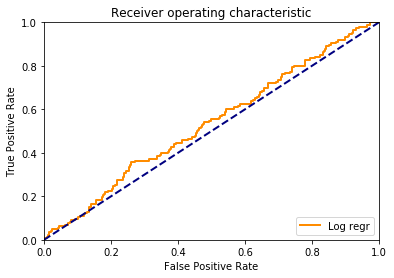

auc: 0.534


In [130]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

plt.figure()
line_width = 2
fpr, tpr, thresholds = roc_curve(y_test, y_pred_log)
plt.plot(fpr, tpr, color='darkorange', lw=line_width, label='Log regr')
plt.plot([0, 1], [0, 1], color='navy', lw=line_width, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
auc = roc_auc_score(y_test, y_pred_log)
print('auc: %.3f' % auc)

## Алгоритм h2o

In [ ]:
#https://github.com/h2oai/h2o-tutorials/blob/master/h2o-world-2017/automl/Python/automl_regression_powerplant_output.ipynb

In [134]:
df_h2o = h2o.H2OFrame(train)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [137]:
y = 'CSI'

In [138]:
splits = df_h2o.split_frame(ratios = [0.8], seed = 1)
train = splits[0]
test = splits[1]

In [150]:
print('df_h2o.shape = ', df_h2o.shape )
print('train.shape = ', train.shape )
print('test.shape = ', test.shape )

df_h2o.shape =  (4048, 38)
train.shape =  (3254, 38)
test.shape =  (794, 38)


In [151]:
test

CSI,CONTACT_DATE,COM_CAT#1,COM_CAT#2,COM_CAT#3,BASE_TYPE,ACT,ARPU_GROUP,COM_CAT#7,COM_CAT#8,DEVICE_TYPE_ID,INTERNET_TYPE_ID,REVENUE,ITC,VAS,RENT_CHANNEL,ROAM,COST,COM_CAT#17,COM_CAT#18,COM_CAT#19,COM_CAT#20,COM_CAT#21,COM_CAT#22,COM_CAT#23,COM_CAT#25,COM_CAT#26,COM_CAT#27,COM_CAT#28,COM_CAT#29,COM_CAT#30,COM_CAT#31,COM_CAT#32,COM_CAT#33,COM_CAT#34,SUM_MINUTES_x,SUM_DATA_MB_x,SUM_DATA_MIN_x
0,27.05,8,12,3.83333,2,1,6.16667,2.91667,1102.33,3,3,0.118478,0.00483367,0.0858807,0.0550377,0,0.00481675,0,0,0.026212,0.70165,0.019298,0.70165,0.116275,1,1,0.0140658,0.00397217,0,0,0.0393712,0.027579,0.103896,3,-0.105326,0,0
0,2.05,8,40,5,2,1,5.41667,6,142,5,1,0.118155,0,0.084167,0.0550893,0,0.00421617,0,0,0.026212,0.702002,0.019298,0.702002,0.11962,1,1,1.91667e-06,0,0.00111417,0,0.00012725,0.027579,0.103896,9,-0.00306432,-0.00375073,-0.146584
0,20.05,2,18,2.41667,2,1,10.8333,1,847,5,2,0.14109,0.075309,0.0907254,0.0554743,0,0.0123447,0,0,0.026212,0.703794,0.019298,0.703794,0.132282,1,1,0.0451444,0.0752991,0.00262142,0,0.0643042,0.027579,0.103896,9,-0.159028,-0.00568646,-0.467146
0,24.05,3,53,5,2,1,4.83333,4,84.8333,5,1.83333,0.120941,0.0021895,0.0861772,0.0549872,0,0.00456308,0,0,0.026212,0.702716,0.019298,0.702716,0.12159,1,1,0.00360142,0.0021895,2.21667e-05,0,0.0101364,0.027579,0.103896,10,-0.00690016,8.04219e-06,0.000959094
0,12.05,5,17,5,2,1,9.41667,1,1322,5,2,0.131875,0.0141781,0.0870512,0.0558976,0,0.00591258,0,0,0.026212,0.705525,0.019298,0.705525,0.130056,1,1,0.0141331,0.0137755,0.0229622,0,0.0300862,0.027579,0.103896,2,-0.0355265,-0.0238843,-0.442068
0,7.05,3,53,1.83333,2,1,1.58333,3,928,3,3,0.108514,0.00026,0.0849721,0.0549678,0,0.00428592,0,0,0.026212,0.698548,0.019298,0.698548,0.109944,1,1,3.26667e-05,0.00026,0,0,0.00179483,0.027579,0.103896,4,-0.00681589,0,0
0,27.05,1,30,2,2,1,4.25,1,1361,5,1,0.115301,0.00377525,0.0879782,0.0550885,0,0.00485067,0,0,0.026212,0.700504,0.019298,0.700504,0.115898,1,1,0.00373658,0.00377525,0.000479833,0,0.0102453,0.0275849,0.103896,9.16667,-0.0050935,0,-2.27118e-06
1,10.05,8,15,7.91667,1.83333,1,3.91667,3,851.25,5,1.66667,0.111107,0.000461083,0.0847279,0.0553458,0,0.00432017,0.00340617,0.0626821,0.026212,0.699436,0.0198137,0.699228,0.111046,1,1,0.00659867,0.000461083,4.16667e-07,8.33333e-08,0.0775053,0.027579,0.103896,10,-0.145632,0,0
0,11.05,1,30,11.3333,1.66667,1,11.1111,2,1053.44,5,1.11111,0.143034,0.0459027,0.0882683,0.0558058,0,0.00921567,0.117081,0,0.026212,0.706902,0.0273474,0.702642,0.137473,1,1,0.0257093,0.0451597,0.00401433,2.53333e-05,0.0625549,0.027579,0.103896,1.44444,-0.115848,-0.0146239,-0.229644
0,29.05,2,32,5,2,1,11.0833,1,1291.83,5,1.83333,0.142652,0.0193742,0.0909878,0.0592344,0.00171383,0.00866842,0,0,0.026212,0.707191,0.019298,0.707191,0.141082,1,1,0.0121309,0.019335,0.0330987,0,0.0562877,0.0309993,0.106958,2.5,-0.104903,-0.100452,-0.641499


In [152]:
y_test = test['CSI']

In [142]:
aml = H2OAutoML(max_runtime_secs = 60, seed = 1, project_name = "powerplant_lb_frame")
aml.train(y = y, training_frame = train, leaderboard_frame = test)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [ ]:
# демонстрационных целях мы также выполним второй прогон AutoML, на этот раз предоставив исходный полный набор данных df
#(без передачи leaderboard_frame). Это более эффективное использование наших данных, поскольку мы можем использовать 
#для обучения 100% данных, а не 80%, как мы это делали выше. На этот раз наша таблица лидеров будет использовать 
#перекрестные проверенные метрики.

In [143]:
aml2 = H2OAutoML(max_runtime_secs = 60, seed = 1, project_name = "powerplant_full_data")
aml2.train(y = y, training_frame = df_h2o)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [144]:
aml.leaderboard.head()

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
DeepLearning_grid_1_AutoML_20190115_221545_model_4,0.13672,0.369757,0.13672,0.257495,0.256362
DeepLearning_grid_1_AutoML_20190115_221545_model_3,0.136906,0.370008,0.136906,0.261825,0.257117
GBM_grid_1_AutoML_20190115_221545_model_9,0.137061,0.370217,0.137061,0.269019,0.258648
GBM_grid_1_AutoML_20190115_221545_model_1,0.137084,0.370248,0.137084,0.268614,0.258563
GBM_grid_1_AutoML_20190115_221545_model_2,0.137087,0.370253,0.137087,0.267449,0.258319
StackedEnsemble_AllModels_AutoML_20190115_221545,0.137356,0.370615,0.137356,0.268991,0.258397
StackedEnsemble_BestOfFamily_AutoML_20190115_221545,0.137528,0.370847,0.137528,0.269021,0.258441
GLM_grid_1_AutoML_20190115_221545_model_1,0.139509,0.373509,0.139509,0.269145,0.259194
GBM_1_AutoML_20190115_221545,0.140008,0.374177,0.140008,0.268927,0.262614
GBM_5_AutoML_20190115_221545,0.14009,0.374285,0.14009,0.269042,0.262673


In [145]:
aml2.leaderboard.head()

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
GLM_grid_1_AutoML_20190115_221759_model_1,0.131106,0.362085,0.131106,0.262046,0.253675
StackedEnsemble_BestOfFamily_AutoML_20190115_221759,0.131609,0.362779,0.131609,0.262376,0.25399
GBM_grid_1_AutoML_20190115_221759_model_1,0.131659,0.362848,0.131659,0.264114,0.254367
StackedEnsemble_AllModels_AutoML_20190115_221759,0.131712,0.362921,0.131712,0.262355,0.254163
GBM_grid_1_AutoML_20190115_221759_model_10,0.131794,0.363034,0.131794,0.263601,0.254346
GBM_grid_1_AutoML_20190115_221759_model_2,0.131824,0.363075,0.131824,0.26369,0.254425
GBM_grid_1_AutoML_20190115_221759_model_9,0.132067,0.36341,0.132067,0.265362,0.255056
DeepLearning_grid_1_AutoML_20190115_221759_model_4,0.133223,0.364997,0.133223,0.271141,0.257743
GBM_5_AutoML_20190115_221759,0.134158,0.366276,0.134158,0.263351,0.257983
DeepLearning_grid_1_AutoML_20190115_221759_model_3,0.135144,0.36762,0.135144,0.274875,0.260981


## Предсказание Predict Using Leader Model

In [146]:
pred = aml.predict(test)
pred.head()

deeplearning prediction progress: |███████████████████████████████████████| 100%


predict
0.145367
0.14567
0.153781
0.145247
0.145928
0.13268
0.143688
0.145065
0.134951
0.136212


In [148]:
pred.shape

(794, 1)

In [154]:
y_test.shape

(794, 1)

## Оценка

In [147]:
perf = aml.leader.model_performance(test)
perf


ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 0.13672020869764695
RMSE: 0.36975695895770094
MAE: 0.25749453056527544
RMSLE: 0.2563620246691941
Mean Residual Deviance: 0.13672020869764695


In [165]:
y_test_as_list = h2o.as_list(y_test, use_pandas=False) 
y_test_as_list = y_test_as_list[1:]
pred_as_list = h2o.as_list(pred, use_pandas=False) 
pred_as_list = pred_as_list[1:]

## Алгоритм auto_sklearn

In [ ]:
#https://www.ml4aad.org/automl/auto-sklearn/

In [186]:
train_auto = train

In [ ]:
https://automl.github.io/auto-sklearn/stable/installation.html#windows-osx-compability

In [187]:
X = train_auto.drop(('CSI'), axis=1)  # Выбрасываем столбец 'class'.  
y = train['CSI']
feature_names = X.columns
print(feature_names)

Index(['CONTACT_DATE', 'COM_CAT#1', 'COM_CAT#2', 'COM_CAT#3', 'BASE_TYPE',
       'ACT', 'ARPU_GROUP', 'COM_CAT#7', 'COM_CAT#8', 'DEVICE_TYPE_ID',
       'INTERNET_TYPE_ID', 'REVENUE', 'ITC', 'VAS', 'RENT_CHANNEL', 'ROAM',
       'COST', 'COM_CAT#17', 'COM_CAT#18', 'COM_CAT#19', 'COM_CAT#20',
       'COM_CAT#21', 'COM_CAT#22', 'COM_CAT#23', 'COM_CAT#25', 'COM_CAT#26',
       'COM_CAT#27', 'COM_CAT#28', 'COM_CAT#29', 'COM_CAT#30', 'COM_CAT#31',
       'COM_CAT#32', 'COM_CAT#33', 'COM_CAT#34', 'SUM_MINUTES_x',
       'SUM_DATA_MB_x', 'SUM_DATA_MIN_x'],
      dtype='object')


In [188]:
from sklearn import ensemble
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)

In [190]:
import autosklearn.classification
cls = autosklearn.classification.AutoSklearnClassifier()
cls.fit(X_train, y_train)
predictions = cls.predict(X_test, y_test)

ModuleNotFoundError: No module named 'autosklearn'

## Деление на train и test, алгоритм MLBox

In [200]:
from mlbox.preprocessing import *
from mlbox.optimisation import *
from mlbox.prediction import *

ModuleNotFoundError: No module named 'mlbox'

In [201]:
import xgboost as xgb

## Auto_ml (Не з)

In [66]:
from sklearn import datasets
from auto_ml import Predictor

In [ ]:
#https://pypi.org/project/automl/

In [67]:
train = pd.read_csv('train_auto_ml.csv', sep=',', decimal = '.', engine = 'python')
train.head(7)

,SK_ID,CSI,CONTACT_DATE,COM_CAT#1,COM_CAT#2,COM_CAT#3,BASE_TYPE,ACT,ARPU_GROUP,COM_CAT#7,...,COM_CAT#28,COM_CAT#29,COM_CAT#30,COM_CAT#31,COM_CAT#32,COM_CAT#33,COM_CAT#34,SUM_MINUTES_x,SUM_DATA_MB_x,SUM_DATA_MIN_x
0,2,0.0,4.05,7.0,77.0,11.500000,1.0,1.0,8.500000,2.000000,...,0.004862,0.000046,0.002075,0.020449,0.027579,0.103896,9.0,-0.036174,-0.004328,-0.379529
1,3,0.0,21.05,4.0,51.0,13.500000,1.5,1.0,9.000000,2.000000,...,0.019320,0.001019,0.000105,0.014257,0.027579,0.103896,9.0,-0.057364,-0.000938,-0.289759
2,4,0.0,27.05,8.0,12.0,3.833333,2.0,1.0,6.166667,2.916667,...,0.003972,0.000000,0.000000,0.039371,0.027579,0.103896,3.0,-0.105326,0.000000,0.000000
3,5,0.0,8.05,3.0,79.0,2.000000,2.0,1.0,8.833333,1.000000,...,0.002000,0.071332,0.001833,0.051395,0.027579,0.103896,2.0,-0.130796,-0.079279,-0.739966
4,6,1.0,6.05,5.0,48.0,5.000000,2.0,1.0,2.166667,4.000000,...,0.000103,0.000000,0.000000,0.012235,0.027579,0.103900,3.0,-0.026522,0.000000,0.000000
5,7,0.0,3.05,7.0,73.0,3.333333,2.0,1.0,10.000000,1.750000,...,0.036967,0.009841,0.001592,0.047106,0.027579,0.104090,2.0,-0.075955,-0.041332,-1.011549
6,8,1.0,30.05,5.0,41.0,3.333333,2.0,1.0,7.166667,4.000000,...,0.035177,0.000000,0.000000,0.023366,0.027579,0.103896,3.0,-0.080295,0.000000,0.000000


In [68]:
from sklearn.cross_validation import train_test_split

my_train, my_test = train_test_split(train, test_size = 0.2, random_state = 11)
my_train.head()

,SK_ID,CSI,CONTACT_DATE,COM_CAT#1,COM_CAT#2,COM_CAT#3,BASE_TYPE,ACT,ARPU_GROUP,COM_CAT#7,...,COM_CAT#28,COM_CAT#29,COM_CAT#30,COM_CAT#31,COM_CAT#32,COM_CAT#33,COM_CAT#34,SUM_MINUTES_x,SUM_DATA_MB_x,SUM_DATA_MIN_x
2340,2723,0.0,21.05,7.0,63.0,13.5,1.5,1.0,8.500000,2.00,...,0.001333,0.000654,0.003833,0.000264,0.123125,0.104805,5.500000,0.000010,-0.186139,-0.881348
2435,2830,0.0,5.05,5.0,10.0,5.0,2.0,1.0,5.750000,3.50,...,0.002825,0.000000,0.000000,0.020390,0.027579,0.103896,3.000000,-0.019303,0.000000,0.000000
1311,1517,0.0,18.05,5.0,17.0,5.0,2.0,1.0,8.916667,3.00,...,0.022231,0.000040,0.000001,0.040939,0.027579,0.103896,9.250000,-0.138021,-0.000001,-0.000053
2878,3356,1.0,12.05,1.0,30.0,5.0,2.0,1.0,12.000000,1.25,...,0.124182,0.003582,0.018356,0.140483,0.027781,0.103994,2.000000,-0.192913,-0.053153,-0.930435
2601,3025,0.0,5.05,4.0,36.0,5.0,2.0,1.0,7.166667,3.00,...,0.019900,0.000000,0.000000,0.017379,0.027579,0.103896,9.416667,-0.042595,0.000000,0.000000


In [69]:
from auto_ml.utils import get_boston_dataset

column_descriptions = {
    'CSI': 'output',
}

ml_predictor = Predictor(type_of_estimator='regressor', column_descriptions=column_descriptions)

ml_predictor.train(my_train)

ml_predictor.score(my_test, my_test.CSI)

Welcome to auto_ml! We're about to go through and make sense of your data using machine learning, and give you a production-ready pipeline to get predictions with.

If you have any issues, or new feature ideas, let us know at http://auto.ml
You are running on version 2.9.9
Now using the model training_params that you passed in:
{}
After overwriting our defaults with your values, here are the final params that will be used to initialize the model:
{'learning_rate': 0.1, 'presort': False, 'warm_start': True}
Running basic data cleaning
Fitting DataFrameVectorizer
Now using the model training_params that you passed in:
{}
After overwriting our defaults with your values, here are the final params that will be used to initialize the model:
{'learning_rate': 0.1, 'presort': False, 'warm_start': True}


********************************************************************************************
About to fit the pipeline for the model GradientBoostingRegressor to predict CSI
Started at:
2019-0

None


***********************************************
Advanced scoring metrics for the trained regression model on this particular dataset:

Here is the overall RMSE for these predictions:
0.38594136174110927

Here is the average of the predictions:
0.1485035166953008

Here is the average actual value on this validation set:
0.18024691358024691

Here is the median prediction:
0.1521085219221472

Here is the median actual value:
0.0

Here is the mean absolute error:
0.2753651871893573

Here is the median absolute error (robust to outliers):
0.1521085219221472

Here is the explained variance:
-0.0012529120399169535

Here is the R-squared value:
-0.008072464911329291
Count of positive differences (prediction > actual):
664
Count of negative differences:
146
Average positive difference:
0.14859461607422614
Average negative difference:
-0.8519107982883045


***********************************************




-0.38594136174110927

In [96]:
print("MAE 0.2753651871893573")
print("MSE 0.1543246742054576")

MAE 0.2753651871893573
MSE 0.1543246742054576


## Использование hpsklearn

In [39]:
from hpsklearn import HyperoptEstimator, any_classifier
from hyperopt import tpe

In [ ]:
https://github.com/hyperopt/hyperopt-sklearn
https://www.ml4aad.org/wp-content/uploads/2018/07/automl_book_draft_hyperopt-sklearn.pdf
http://hyperopt.github.io/hyperopt-sklearn/#documentation

In [ ]:
#Аннотация. Hyperopt-sklearn - это программный проект, который обеспечивает автоматическую настройку алгоритма библиотеки машинного обучения Scikit-learn. Следуя Auto-Weka, мы считаем, что выбор классификатора и даже выбор модуля предварительной обработки могут быть объединены
#представлять одну большую задачу оптимизации гиперпараметра. Мы
#используйте Hyperopt для определения пространства поиска, которое включает в себя множество стандартных компонентов (например, SVM, RF, KNN, PCA, TFIDF) и общее
#образцы составления их вместе.

In [55]:
train_hp = train

In [56]:
X = train_hp.drop(('CSI'), axis=1)  # Выбрасываем столбец 'class'.  
y = train['CSI']
feature_names = X.columns
print(feature_names)

Index(['CONTACT_DATE', 'COM_CAT#1', 'COM_CAT#2', 'COM_CAT#3', 'BASE_TYPE',
       'ACT', 'ARPU_GROUP', 'COM_CAT#7', 'COM_CAT#8', 'DEVICE_TYPE_ID',
       'INTERNET_TYPE_ID', 'REVENUE', 'ITC', 'VAS', 'RENT_CHANNEL', 'ROAM',
       'COST', 'COM_CAT#17', 'COM_CAT#18', 'COM_CAT#19', 'COM_CAT#20',
       'COM_CAT#21', 'COM_CAT#22', 'COM_CAT#23', 'COM_CAT#25', 'COM_CAT#26',
       'COM_CAT#27', 'COM_CAT#28', 'COM_CAT#29', 'COM_CAT#30', 'COM_CAT#31',
       'COM_CAT#32', 'COM_CAT#33', 'COM_CAT#34', 'SUM_MINUTES_x',
       'SUM_DATA_MB_x', 'SUM_DATA_MIN_x'],
      dtype='object')


In [79]:
from sklearn import ensemble
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)

In [80]:
from hpsklearn import HyperoptEstimator, any_classifier, pca
from hyperopt import tpe
import numpy as np


# Instantiate a HyperoptEstimator with the search space and number of evaluations
# Create the estimator object
#preprocessing= pca('my_pca'),
estim = HyperoptEstimator(classifier=any_classifier('my_clf'),
                          algo=tpe.suggest,
                          max_evals=100,
                          trial_timeout=120)


# Search the hyperparameter space based on the data
# Search the space of classifiers and preprocessing steps and their
estim.fit(X_train, y_train)


# Make a prediction using the optimized model
prediction = estim.predict(X_test)

# Report the accuracy of the classifier on a given set of data
score = estim.score(X_test, y_test)

# Return instances of the classifier and preprocessing steps
model = estim.best_model()
# Show the results

print(estim.score(X_test, y_test))


print( estim.best_model() )

##accuracy

0.3
{'learner': RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=3, max_features=0.8456036487884346,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=3,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=135, n_jobs=1, oob_score=False, random_state=4,
            verbose=False, warm_start=False), 'preprocs': (PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False),), 'ex_preprocs': ()}


In [87]:
import sklearn.metrics
print("MAE", sklearn.metrics.mean_absolute_error(y_test, prediction))
print("MSE", sklearn.metrics.mean_squared_error(y_test, prediction))
print("Accuracy", sklearn.metrics.accuracy_score(y_test, prediction))

MAE 1.2
MSE 2.2
Accuracy 0.3


In [ ]:
###########################################################

## Autoweka

In [ ]:
https://github.com/automl/pyautoweka

In [52]:
from pyautoweka import CrossValidation, RandomSubSampling
from pyautoweka import ClassificationExperiment, RegressionExperiment, AVAILABLE_CLASSIFIERS

ImportError: cannot import name 'DataSet'

In [54]:
import pyautoweka


#Create an experiment
#tuner_timeout время оптимизации в секундах. Так, например, 360 секунд = 6 минут. Чем дольше вы проводите оптимизацию, тем лучше
experiment = pyautoweka.ClassificationExperiment(tuner_timeout=360)

ImportError: cannot import name 'DataSet'

# Tpot

In [ ]:
#https://github.com/EpistasisLab/tpot

In [92]:
X = train.drop(('CSI'), axis=1)  # Выбрасываем столбец 'class'.  
y = train['CSI']
feature_names = X.columns
print(feature_names)

Index(['CONTACT_DATE', 'COM_CAT#1', 'COM_CAT#2', 'COM_CAT#3', 'BASE_TYPE',
       'ACT', 'ARPU_GROUP', 'COM_CAT#7', 'COM_CAT#8', 'DEVICE_TYPE_ID',
       'INTERNET_TYPE_ID', 'REVENUE', 'ITC', 'VAS', 'RENT_CHANNEL', 'ROAM',
       'COST', 'COM_CAT#17', 'COM_CAT#18', 'COM_CAT#19', 'COM_CAT#20',
       'COM_CAT#21', 'COM_CAT#22', 'COM_CAT#23', 'COM_CAT#25', 'COM_CAT#26',
       'COM_CAT#27', 'COM_CAT#28', 'COM_CAT#29', 'COM_CAT#30', 'COM_CAT#31',
       'COM_CAT#32', 'COM_CAT#33', 'COM_CAT#34', 'SUM_MINUTES_x',
       'SUM_DATA_MB_x', 'SUM_DATA_MIN_x'],
      dtype='object')


In [94]:
from sklearn import ensemble
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)

In [95]:
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split

tpot = TPOTClassifier(generations=5, population_size=20, verbosity=2)
tpot.fit(X_train, y_train)
pred = tpot.predict(X_test)

Generation 1 - Current best internal CV score: 0.8499077880802748
Generation 2 - Current best internal CV score: 0.8499077880802748
Generation 3 - Current best internal CV score: 0.8502169070910938
Generation 4 - Current best internal CV score: 0.8502169070910938
Generation 5 - Current best internal CV score: 0.8502169070910938

Best pipeline: BernoulliNB(LinearSVC(FastICA(input_matrix, tol=0.9), C=1.0, dual=False, loss=squared_hinge, penalty=l2, tol=0.001), alpha=100.0, fit_prior=True)


In [103]:
print("MAE", sklearn.metrics.mean_absolute_error(y_test, pred))
print("MSE", sklearn.metrics.mean_squared_error(y_test, pred))
print("Accuracy", sklearn.metrics.accuracy_score(y_test, pred))

MAE 0.18024691358024691
MSE 0.18024691358024691
Accuracy 0.8197530864197531


In [134]:
pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [135]:
y_test

SK_ID
223     0.0
664     1.0
1386    0.0
3073    0.0
1059    0.0
2821    0.0
451     0.0
3894    0.0
1478    0.0
183     0.0
172     0.0
2490    1.0
420     1.0
1245    1.0
4049    0.0
2752    1.0
4242    1.0
14      0.0
4331    1.0
3273    1.0
3841    0.0
3109    0.0
2437    1.0
3081    1.0
390     0.0
2016    0.0
3162    0.0
1204    0.0
3655    1.0
1256    0.0
       ... 
1707    0.0
3682    1.0
289     0.0
843     0.0
3925    0.0
2205    0.0
3339    1.0
3146    0.0
318     0.0
3192    0.0
4442    0.0
1444    0.0
883     0.0
4695    0.0
4168    0.0
182     1.0
1749    0.0
2333    0.0
2332    0.0
3469    1.0
692     0.0
2157    0.0
1604    0.0
4109    0.0
2340    0.0
927     0.0
3522    1.0
2348    0.0
1633    0.0
2980    0.0
Name: CSI, Length: 810, dtype: float64